<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Modeltf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install joblib
import tensorflow as tf 
import pickle
#from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow


In [286]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
## 64 BIT (2253,4016)
'''
with open('/content/drive/My Drive/ffeatures64.bin','rb') as file:
  features = pickle.load(file)
with open('/content/drive/My Drive/flabels64.bin','rb') as file:
  labels = pickle.load(file)
'''

In [0]:
## 48 BIT (2253,2315)
'''
features = joblib.load('/content/features48.pkl')
labels = joblib.load('/content/labels48.pkl')
'''

In [0]:
## 56 BIT (2253,3147)

# features = joblib.load('/content/features56.pkl')
# labels = joblib.load('/content/labels56.pkl')


In [0]:
## 64 BIT (2253,3147)

features = joblib.load('/content/features64.pkl')
labels = joblib.load('/content/labels64.pkl')


In [0]:
## 32 BIT (2253,1035)

# features = joblib.load('/content/features32.pkl')
# labels = joblib.load('/content/labels32.pkl')

In [0]:
## 16 BIT (2253,267)
'''
features = joblib.load('/content/features16.pkl')
labels = joblib.load('/content/labels16.pkl')
'''

"\nfeatures = joblib.load('/content/features16.pkl')\nlabels = joblib.load('/content/labels16.pkl')\n"

In [288]:
# print(features[0])
# print(len(features[0]))
# print(len(features))
print(np.shape(features))

(2253, 4107)


In [0]:
## TEST SET 

x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()

In [291]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10695248307214488202
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6949615099271388627
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5450290982856377801
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16543642195310958153
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
x = tf.placeholder(shape = (None,4107), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

wh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((4107, 7000)))
bh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,7000)))

#out

wo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((7000,1)))
bo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,1)))


                

In [0]:
hidl = tf.add(tf.matmul(x,wh),bh, name ='hidden1')

In [0]:
outl = tf.add(tf.matmul(hidl,wo),bo,name = 'output')

Add additional custom loss functions if necc 
reducing mean sqaure error 
1. reducing max deviation 

In [0]:
loss = tf.reduce_mean(tf.square(tf.subtract(y,outl))) + 0.3*tf.reduce_max(tf.subtract(y,outl))
#default lr = 0.001
opt = tf.train.AdamOptimizer(name = 'optimizer')
op_train = opt.minimize(loss, name ='train_op')

In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

In [299]:
train=[]
val=[]
with tf.device('/device:CPU:0'):
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    mini =[]
    for i in range(0,500):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
        
        ##TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      z= sess.run([loss,op_train], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      ##VALIDATION LOSS
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    
    simple_save(sess,'/content/drive/My Drive/Custom_Models/model1000_64updhidden',inputs = {'input' : x}, outputs = {'output': outl})
    print('Saved model!')
    

4222.431	57508.43
53370.37	4321.9756
4777.5015	7511.1357
9557.372	23996.027
21765.898	19311.48
17738.088	6121.559
6247.668	235.59573
1043.7715	4914.648
3978.0535	8629.1
8710.55	11313.72
8707.353	6905.777
5402.921	2932.9307
3176.0913	660.3533
467.52515	682.7811
400.38376	2931.7925
2261.5898	5024.9746
3820.4954	4547.5894
4870.8296	2495.9705
5594.924	4198.0933
1796.916	1655.2852
1047.1876	770.83655
1032.4462	714.21063
368.42538	667.38696
1003.71265	1637.6635
1176.7194	2243.2688
1641.045	1299.6798
1736.4258	1808.41
1396.2529	1549.331
978.1431	668.7198
696.349	784.12994
272.13596	769.35205
571.59503	291.41702
1079.2421	360.46127
186.5605	1703.5303
270.52725	651.76483
337.02875	634.50525
1122.1713	278.76355
365.05594	1238.4814
480.89484	1387.6318
1627.6285	363.2862
315.8927	883.87164
1443.7948	858.07935
1330.1383	259.1857
867.3398	1094.7682
1365.9458	796.4028
1254.2273	927.8576
524.82886	847.8657
728.45245	1069.4662
1366.1284	890.81
457.00006	891.10706
493.03278	900.7498
1105.2389	321.50266


In [0]:
with open('/content/drive/My Drive/Custom_Models/graph1000_64updhidden.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())

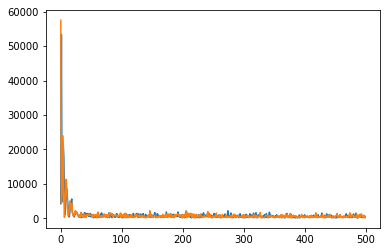

In [301]:
plt.plot(train)
plt.plot(val)

In [310]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(4107, 7000) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1, 7000) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(7000, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1, 1) dtype=float32_ref>]

In [0]:
with open('/content/drive/My Drive/Custom_Models/graph1000_updatedloss.pb', 'rb') as f:
  g1 = f.read()
with open('/content/drive/My Drive/Custom_Models/graph1000.pb', 'rb') as f:
  g2 = f.read()

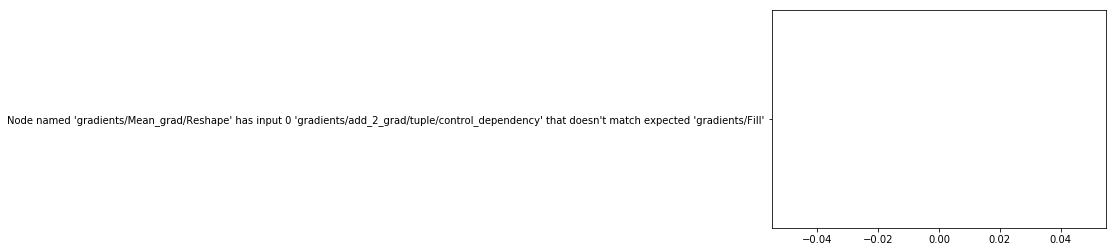

In [0]:
diff = pywrap_tensorflow.EqualGraphDefWrapper(g1,g2) 
#plt.plot(diff)

56

400